In [46]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
from pylab import rcParams
from pandas.plotting import parallel_coordinates

plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.size"] = '14'

Populating the interactive namespace from numpy and matplotlib


C:\Users\Francesca\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [47]:
series = pd.Series.from_csv('ibm_daily_1962-2018.csv', sep='\t',header=0)

# Divisione in anni (senza normalizzazione dei valori)

In [48]:
from pandas import TimeGrouper
from pandas import DataFrame
years= []
groups = series.groupby(TimeGrouper('A'))
series_df=DataFrame()

for name, group in groups:
    series_df[name.year]=pd.Series(group.values)
    years.append(name.year)
    
series_df.head()

,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,7.713333,5.200000,6.800000,6.825000,8.291667,9.2875,15.67500,15.7500,18.225000,15.8375,...,83.889999,131.179993,147.210007,186.729996,194.089996,187.210007,161.309998,135.600006,167.000000,154.500000
1,7.626667,5.140000,6.893333,6.752083,8.225000,9.2250,15.33750,15.6000,18.299999,15.6500,...,86.419998,131.679993,147.559998,185.570007,195.669998,185.830002,161.270004,136.759995,167.770004,157.339996
2,7.693333,5.293334,6.816667,6.766667,8.216666,9.1250,15.04375,15.3750,18.412500,15.8125,...,87.110001,130.679993,147.339996,184.809998,194.190002,187.149994,159.669998,134.380005,169.250000,159.649994
3,7.606667,5.293334,6.820000,6.841667,8.258333,9.2500,14.76250,15.1250,18.424999,15.9000,...,87.830002,129.869995,147.130005,184.389999,193.399994,186.389999,157.199997,133.699997,168.690002,162.440002
4,7.460000,5.293334,6.773334,6.975000,8.300000,9.4750,14.85000,15.2125,18.437500,15.8125,...,87.809998,129.070007,148.789993,182.199997,192.919998,189.330002,156.240005,133.179993,169.470001,162.660004


In [49]:
#VIENE ELIMINATO IL 2018
series_df1=series_df.drop([2018], axis=1)
if (2018 in years):
    years.remove(2018)
series_df1.head()

,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,7.713333,5.200000,6.800000,6.825000,8.291667,9.2875,15.67500,15.7500,18.225000,15.8375,...,108.989998,83.889999,131.179993,147.210007,186.729996,194.089996,187.210007,161.309998,135.600006,167.000000
1,7.626667,5.140000,6.893333,6.752083,8.225000,9.2250,15.33750,15.6000,18.299999,15.6500,...,104.830002,86.419998,131.679993,147.559998,185.570007,195.669998,185.830002,161.270004,136.759995,167.770004
2,7.693333,5.293334,6.816667,6.766667,8.216666,9.1250,15.04375,15.3750,18.412500,15.8125,...,103.949997,87.110001,130.679993,147.339996,184.809998,194.190002,187.149994,159.669998,134.380005,169.250000
3,7.606667,5.293334,6.820000,6.841667,8.258333,9.2500,14.76250,15.1250,18.424999,15.9000,...,100.250000,87.830002,129.869995,147.130005,184.389999,193.399994,186.389999,157.199997,133.699997,168.690002
4,7.460000,5.293334,6.773334,6.975000,8.300000,9.4750,14.85000,15.2125,18.437500,15.8125,...,100.050003,87.809998,129.070007,148.789993,182.199997,192.919998,189.330002,156.240005,133.179993,169.470001


In [50]:
#sostituisce i NaN con la media
series_df_nn=series_df1.apply(lambda x: x.fillna(x.mean())) 

In [51]:
#traspone la matrice
series_df_tn=series_df_nn.T

In [52]:
#converte in numpy array
series_df_tn_a = series_df_tn.values

# Clustering con structural-based similarity: K-means

In [53]:
from scipy.stats import kurtosis, skew
feat = [ [ mean(year), std(year), skew(year), kurtosis(year), mean(year[1:]-year[:-1]), skew(year[1:]-year[:-1])] for year in series_df_tn_a ]

In [54]:
#sottrae a ogni valore la media dei valori dall'anno 1 a n e divide tutto per la std dei valori dall'anno 1 a n
norm_feat = transpose([ (attr-mean(attr))/std(attr) for attr in transpose(feat) ])

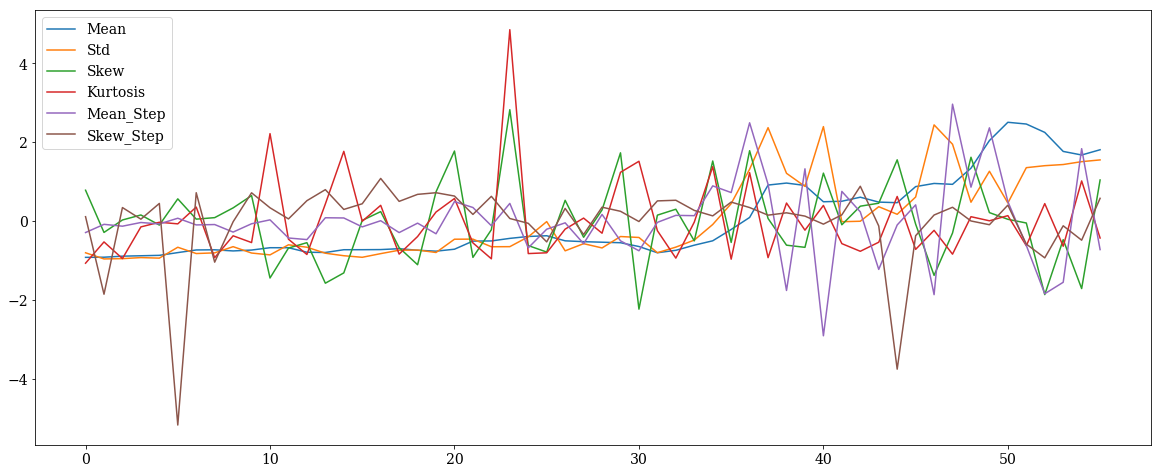

In [55]:
plt.rcParams['figure.figsize'] = (20, 8)
plot(norm_feat)
legend(["Mean", "Std", "Skew", "Kurtosis", "Mean_Step", "Skew_Step"])

In [56]:
norm_feat_df=DataFrame(norm_feat, columns=["Mean", "Std", "Skew", "Kurtosis", "Mean_Step", "Skew_Step"])

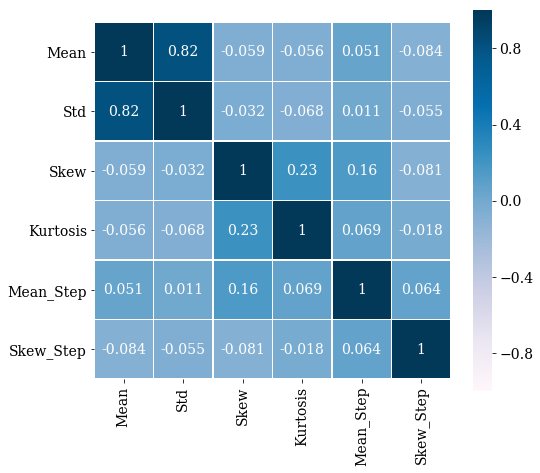

In [57]:
#costruisce l'heat map per vedere eventuali correlazioni tra le variabili
import seaborn as sns
#correlation plot
cmap = cm.get_cmap('PuBu')

fig = plt.figure()
fig.set_size_inches(8,7)

correlati = norm_feat_df.corr()
ax = sns.heatmap(correlati, square=True, cmap=cmap, vmin = -1, vmax = 1, annot = True,linewidths=.5)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
labels = ["Mean", "Std", "Skew", "Kurtosis", "Mean_Step", "Skew_Step"]
#plt.title('Heatmap of correlation matrix', size = 22)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

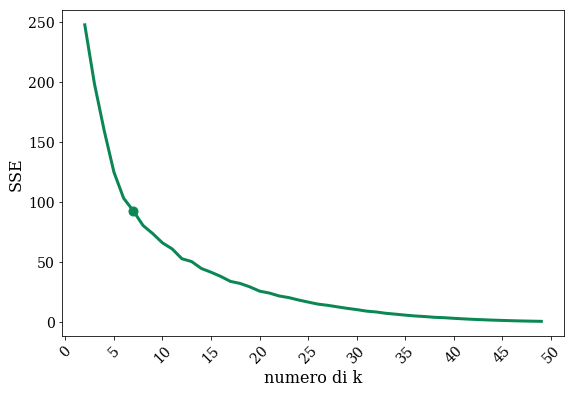

In [58]:
#identificazione del migliore valore di k
from sklearn.metrics import *
from sklearn.cluster import KMeans
sse_list = list()
max_k = 50
plt.rcParams['figure.figsize'] = (9, 6)
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=30, max_iter=200, random_state=2)
    kmeans.fit(norm_feat)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list, linewidth=3, color="#0A8754")
plt.plot(7, sse_list[5],'o', color="#0A8754", markersize=9)
plt.xlabel('numero di k', fontsize=16)
plt.ylabel ('SSE', fontsize=16)
plt.xticks(np.arange(0, 50+1, 5), rotation = '45', fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Images/TimeSeries/KMeansSSE_struct.png', format='png', bbox_inches='tight')

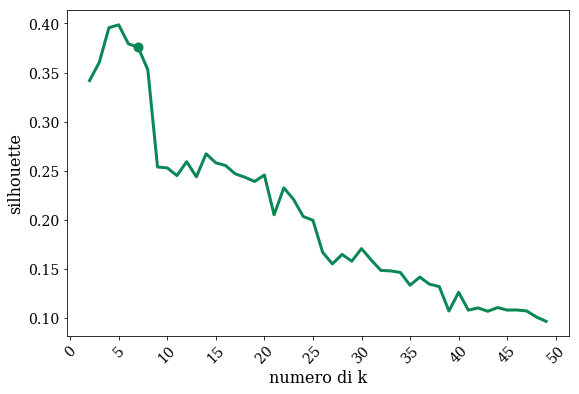

In [59]:
sil_list = list()
max_k = 50
plt.rcParams['figure.figsize'] = (9, 6)
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=30, max_iter=200, random_state=2)
    kmeans.fit(norm_feat)
    sil = silhouette_score(norm_feat, kmeans.labels_)
    sil_list.append(sil)
plt.plot(range(2,max_k), sil_list, linewidth=3, color="#0A8754")
plt.plot(7, sil_list[5],'o', color="#0A8754", markersize=9)
plt.xlabel('numero di k', fontsize=16)
plt.ylabel('silhouette', fontsize=16)
plt.xticks(np.arange(0, 50+1, 5), rotation = '45', fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Images/TimeSeries/KMeansSilhouette_struct.png', format='png', bbox_inches='tight')

In [75]:
#k-means con 7 clusters
kmeans1 = KMeans(init='k-means++', n_clusters=7, n_init=30, max_iter=200, random_state=2)
kmeans1.fit(norm_feat)
hist, bins = np.histogram(kmeans1.labels_, bins=range(0, len(set(kmeans1.labels_)) + 1))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print ('labels', dict(zip(bins, hist)))
    print ('sse', kmeans1.inertia_)
    print ('silhouette', silhouette_score(norm_feat, kmeans1.labels_))

('labels', {0: 5, 1: 29, 2: 2, 3: 10, 4: 5, 5: 4, 6: 1})
('sse', 92.497409683368943)
('silhouette', 0.37586502304906616)


In [61]:
#LE SERIE VENGONO ORA NORMALIZZATE AL FINE DI ESSERE PLOTTATE
norm_series = [ (value-mean(value))/std(value) for value in series_df_tn_a ] #offset translation e amplitude scaling
norm_series_rl= []
for serie in norm_series:
    serie_rl=pd.Series(serie).rolling(window=4, min_periods=1).mean() 
    norm_series_rl.append(serie_rl.values)
norm_series_rl_a=np.array(norm_series_rl)

In [62]:
rcParams['figure.figsize'] = 9,4

def YearsCluster(years_list, labels):
    years_cluster = []
    for ndx, year in enumerate(labels):
        years_cluster.append([years_list[ndx], year])
    result = { x: [y[0] for y in years_cluster if y[1] == x] for x in set(labels)}
    return result


def PrintCluster(series, years_list, cluster, color):
    for i in cluster:
        plt.plot(series[years_list.index(i)], color)
        plt.xlabel('numero di giorni', fontsize=14)
        plt.ylabel ('valore di Open', fontsize=14)
    #plt.show()

In [63]:
clusters = YearsCluster(years, kmeans1.labels_)

In [64]:
clusters

{0: [1963,
  1964,
  1969,
  1973,
  1974,
  1979,
  1980,
  1983,
  1984,
  1986,
  1987,
  1989,
  1994,
  1995,
  1997,
  2003,
  2004],
 1: [2000, 2002, 2005, 2008, 2013, 2014, 2015, 2017],
 2: [1998, 1999, 2001, 2007, 2009, 2010, 2011, 2012, 2016],
 3: [1962,
  1965,
  1966,
  1968,
  1970,
  1971,
  1977,
  1978,
  1981,
  1982,
  1988,
  1990,
  1991,
  1993,
  1996],
 4: [1972, 1975, 1976, 1992],
 5: [1985],
 6: [1967, 2006]}

[1963, 1964, 1969, 1973, 1974, 1979, 1980, 1983, 1984, 1986, 1987, 1989, 1994, 1995, 1997, 2003, 2004]


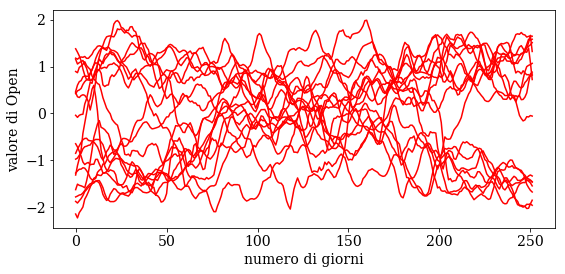

In [65]:
print(clusters[0])
PrintCluster(norm_series_rl_a, years, clusters[0], 'Red')
plt.savefig('Images/TimeSeries/KMeansC1_struct.png', format='png', bbox_inches='tight')

[2000, 2002, 2005, 2008, 2013, 2014, 2015, 2017]


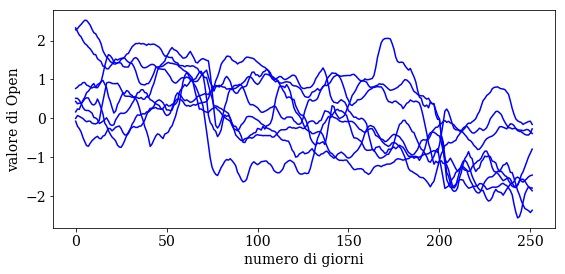

In [66]:
print(clusters[1])
PrintCluster(norm_series_rl_a, years, clusters[1], 'Blue')
plt.savefig('Images/TimeSeries/KMeansC2_struct.png', format='png', bbox_inches='tight')

[1998, 1999, 2001, 2007, 2009, 2010, 2011, 2012, 2016]


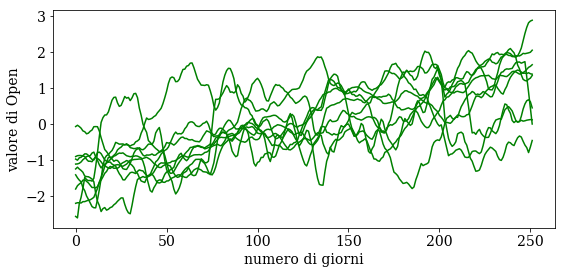

In [67]:
print(clusters[2])
PrintCluster(norm_series_rl_a, years, clusters[2], 'Green')
plt.savefig('Images/TimeSeries/KMeansC3_struct.png', format='png', bbox_inches='tight')

[1962, 1965, 1966, 1968, 1970, 1971, 1977, 1978, 1981, 1982, 1988, 1990, 1991, 1993, 1996]


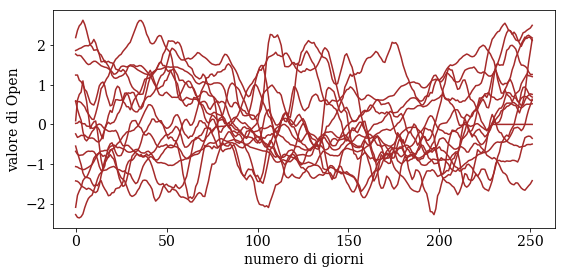

In [68]:
print(clusters[3])
PrintCluster(norm_series_rl_a, years, clusters[3], 'Brown')
plt.savefig('Images/TimeSeries/KMeansC4_struct.png', format='png', bbox_inches='tight')

[1972, 1975, 1976, 1992]


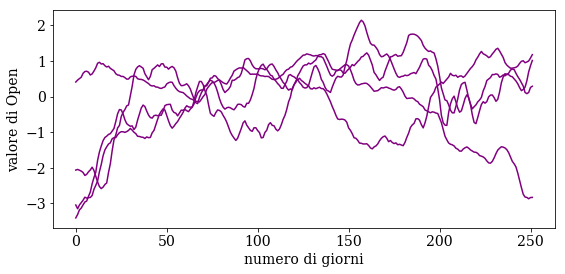

In [69]:
print(clusters[4])
PrintCluster(norm_series_rl_a, years, clusters[4], 'Purple')
plt.savefig('Images/TimeSeries/KMeansC5_struct.png', format='png', bbox_inches='tight')

[1985]


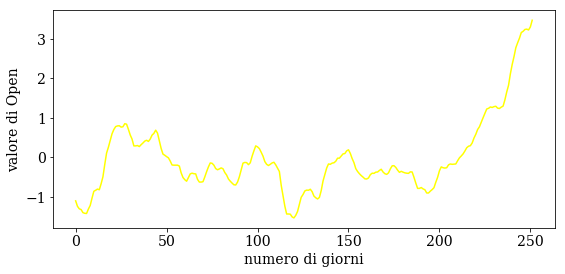

In [70]:
print(clusters[5])
PrintCluster(norm_series_rl_a, years, clusters[5], 'Yellow')
plt.savefig('Images/TimeSeries/KMeansC6_struct.png', format='png', bbox_inches='tight')

[1967, 2006]


"print(clusters[7])\nPrintCluster(series_df_tn_a, years, clusters[7], 'Orange')\n\nprint(clusters[8])\nPrintCluster(series_df_tn_a, years, clusters[8], 'Black')\n\nprint(clusters[9])\nPrintCluster(series_df_tn_a, years, clusters[9], 'Turquoise')\n\nprint(clusters[10])\nPrintCluster(series_df_tn_a, years, clusters[10], 'Violet')\n\nprint(clusters[11])\nPrintCluster(series_df_tn_a, years, clusters[11], 'Pink')"

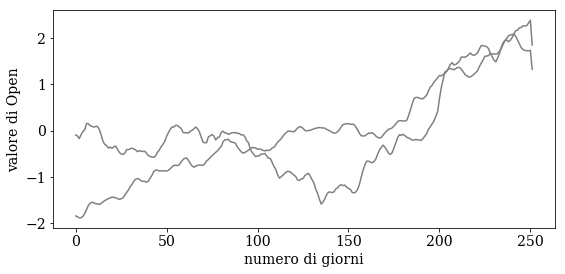

In [71]:
print(clusters[6])
PrintCluster(norm_series_rl_a, years, clusters[6], 'Grey')
plt.savefig('Images/TimeSeries/KMeansC7_struct.png', format='png', bbox_inches='tight')

"""print(clusters[7])
PrintCluster(series_df_tn_a, years, clusters[7], 'Orange')

print(clusters[8])
PrintCluster(series_df_tn_a, years, clusters[8], 'Black')

print(clusters[9])
PrintCluster(series_df_tn_a, years, clusters[9], 'Turquoise')

print(clusters[10])
PrintCluster(series_df_tn_a, years, clusters[10], 'Violet')

print(clusters[11])
PrintCluster(series_df_tn_a, years, clusters[11], 'Pink')"""

In [72]:
#assegna ad ogni riga del dataset il cluster di appartenenza
norm_feat_cl= DataFrame(norm_feat)
norm_feat_cl.columns=['mean',"standard_deviation",'skew',"Kurtosis", "mean_step", "skew_step"]
norm_feat_cl['Labels'] = kmeans1.labels_

(array([-6., -4., -2.,  0.,  2.,  4.,  6.]),
 <a list of 7 Text yticklabel objects>)

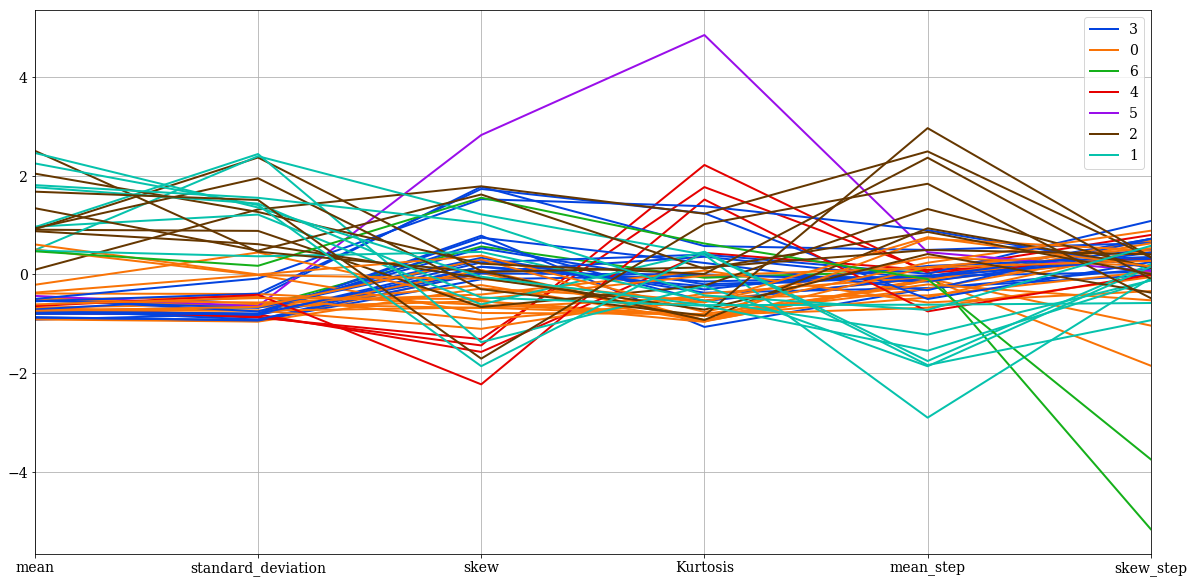

In [73]:
plt.rcParams['figure.figsize'] = (20, 10)
parallel_coordinates(norm_feat_cl, 'Labels', axvlines=False, linewidth=2, color=['xkcd:blue', 'xkcd:orange', 'xkcd:green', 'xkcd:red', 'xkcd:violet', 'xkcd:brown', 'xkcd:turquoise'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)